<a href="https://colab.research.google.com/github/abdalazizrashid/Auger-Electron-Spectroscopy/blob/master/XPS_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import glob
import os.path as osp
import re
plt.rcParams['axes.grid'] = True

### Reading asc file

In [0]:
class AesSpec:
    def __init__(self, filename):
    
        #assert filename.endswith('.asc')
        with open(filename, mode='r') as f:
            self.spec_range = f.readline()
            self.meta0 = f.readline()
            self.surv = f.readline()
            self.something = int(f.readline())
            self.ev_min = float(f.readline())
            self.ev_step = float(f.readline())
            self.n_points = int(f.readline())
            self.data = np.zeros(self.n_points)
            for i in range(self.n_points):
                self.data[i] = float(f.readline())
        idx = pd.Index(data=np.linspace(
                                    self.ev_min,
                                    self.ev_min + self.n_points*self.ev_step,
                                    self.n_points),
                       name='eV')
        self.ts = pd.Series(self.data,
                            name=os.path.split(filename)[-1],
                            index=idx)

    @staticmethod
    def all_specs():
        return glob.glob('asc/*-aes.asc')

In [0]:
root_path = "/home/master/Notebook/AES_standard/*"
dataset = []
elements = []
lenght = []
for file in glob.glob(root_path):
    try:
        filename = osp.splitext(osp.split(file)[-1])[0]
        specs = AesSpec(file).ts
        y = specs.iloc[:].to_numpy()
        #x = specs.index.to_numpy()
        elements.append(filename)
        dataset.append(y)
        lenght.append(len(y))
    except:
        print("Error Reading file!")
dataset, elements_array = np.array(dataset), np.array(elements)


elements = []
for i in elements_array:
  d = re.search(r"([a-zA-Z]*)([0-9])*", i)
  elements.append(d.group(1))

711 3191


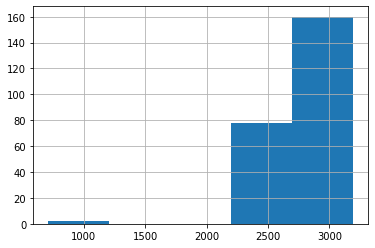

In [4]:
plt.hist(lenght, bins=5)
print(min(lenght), max(lenght))

In [0]:
def smoothdiffS7D7(cnts):
    ''' Create smooth differentiated column from counts using S7D7 PHI algorithm (Multipak tables 
    A-5 and A-1; passing np array (not pandas series)''' 
    numpts=len(cnts)
    endpts=[0,len(cnts)-1] # legacy way of defining endpoints and internal breaks (although those no longer present)
    smooth=[0]*numpts # empty list of correct length for smoothed data
    smoothdiff=[0]*numpts # 7 pt diff of above smoothed data
    # smoothing of endpoints according to Multipak algorithm appendix table A-5    
    for i in range(0,numpts): # special cases for endpoints (within 3 of an evbreak)
        diff=i-min(endpts, key=lambda x:abs(x-i)) # distance from closest evbreak index # in list            
        if diff==0:
            if i==numpts-1: #last point
                smooth[i]=(2*cnts[i]+2*cnts[i-1]+1)/4 # additional special case for last point
            else: # first point
                smooth[i]=(2*cnts[i]+2*cnts[i+1]+1)/4 # all others at exact breaks can use value and adj higher value
        elif abs(diff)==1:  # works for +1 or -1 from nearest break
            smooth[i]=(1*cnts[i-1]+2*cnts[i]+1*cnts[i+1]+1)/4
        elif abs(diff)==2:
            smooth[i]=(-3*cnts[i-2]+12*cnts[i-1]+17*cnts[i]+12*cnts[i+1]+-3*cnts[i+2]+1)/35
        else:
            smooth[i]=(-2*cnts[i-3]+3*cnts[i-2]+6*cnts[i-1]+7*cnts[i]+6*cnts[i+1]+3*cnts[i+2]-2*cnts[i+3]+1)/21

    # Same structure to perform differentiation on smoothed datalist above
    for i in range(0,numpts): # special cases for endpoints (within 3 of an evbreak)
        diff=i-min(endpts, key=lambda x:abs(x-i)) # distance from closest evbreak index # in list
        if abs(diff)<=2:
            smoothdiff[i]=0  # just zero out endpoints (old code moved to python software dev xls cell)
        else:
            smoothdiff[i]=(-3*smooth[i-3]-2*smooth[i-2]-1*smooth[i-1]+1*smooth[i+1]+2*smooth[i+2]+3*smooth[i+3]+1)/28
    smoothdiff=np.asarray(smoothdiff)
    return smoothdiff

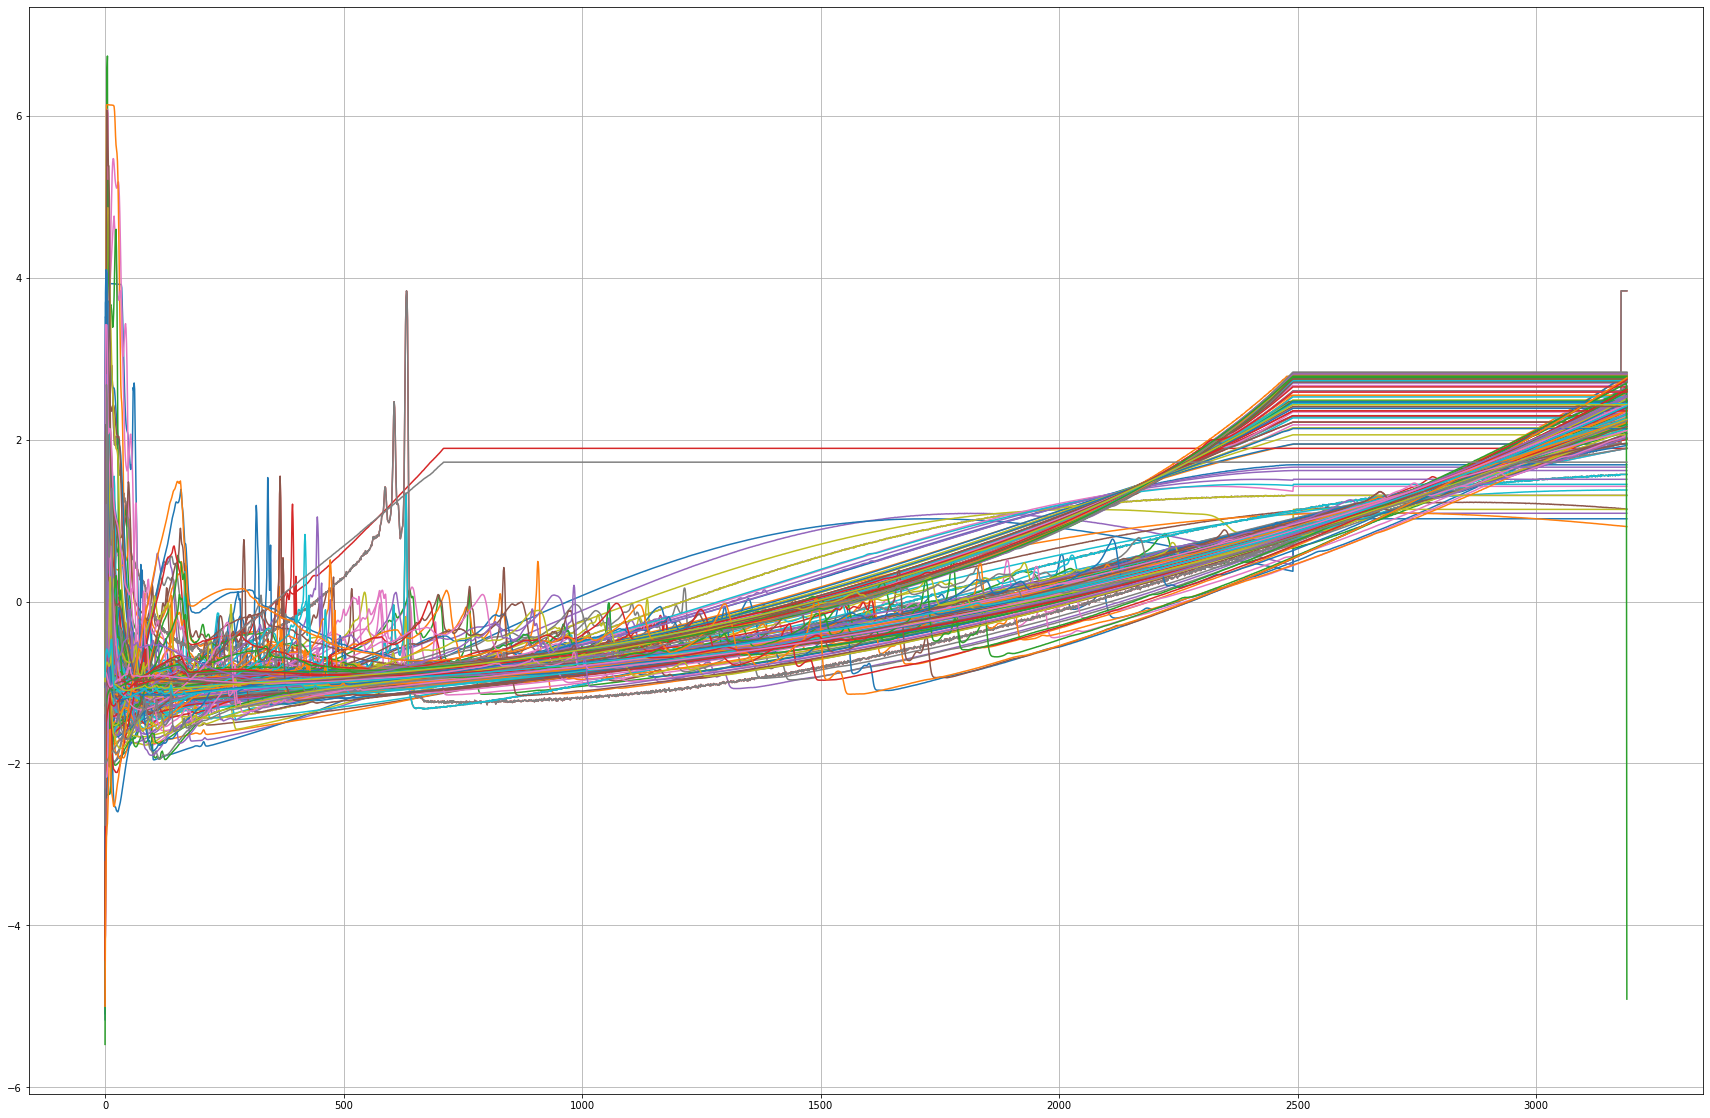

In [6]:
plt.figure(figsize=(30,20))
# Normalize to mean of 0 and standard deviation of 1
def norm(x): return (x-np.mean(x))/np.std(x)

# Normalize to a range between 0, 1
def norm2(x): return (x-np.min(x))/(np.max(x) - np.min(x))

# Padding to respect to the maximum lenght in the dataset
def pad(x):
    shape = ((max(lenght)-len(x)))
    p = np.full(shape, max(x))
    p = np.insert(p, 0, x)
    return p
X = []
Y = []
for i in range(len(dataset)):
    #tmp = smoothdiffS7D7(pad(norm(dataset[i])))
    tmp = pad(norm(dataset[i]))

    plt.plot(tmp)
    Y.append(tmp)
    X.append(np.arange(0, len(tmp)))
#plt.xscale('log')  
#plt.plot(norm(dataset[100]), alpha=0.5, color='r', marker='.')
plt.show()
Y = np.array(Y)
x = np.array(X)


In [0]:
fig, ax = plt.subplots(len(dataset)//4, 4, figsize = (50, 100))
plt.grid(True)
for i in range(len(dataset)):
    ax.flat[i].plot(dataset[i])
    ax.flat[i].set_title(elements[i])
    ax.flat[i].get_xaxis().set_ticks([])
#fig.savefig("AudioWaveform", dpi=900)     

Error in callback <function flush_figures at 0x7f3e0f322560> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
plt.figure(figsize=(30,10))

def mixture(input_array, num_of_samples=3, parameter=1000):
    mix = np.random.dirichlet(np.ones(num_of_samples)/parameter)
    _y = np.zeros((3191))
    for i in range(num_of_samples):
        print()
        _y += np.sqrt(np.power(np.random.permutation(mix[i] * input_array[i], ), 2))
    return _y


plt.plot(mixture(Y, num_of_samples=, parameter= 1000),'r')
plt.plot(Y[0], '.')
plt.plot(Y[1], '-')
plt.plot(Y[2], '-')
plt.show()


#   mix = np.random.dirichlet(np.ones(num_of_samples)/parameter)
#     _y = np.zeros((3191))
#     for i in range(num_of_samples):
#         print()
#         _y += mix[i] * input_array[i]
#     return _y

SyntaxError: ignored

In [0]:
smth = np.zeros((Y.shape[0], ))
smth1 = np.random.dirichlet(np.ones(3))


In [0]:
plt.plot(smth2)

NameError: name 'smth2' is not defined

In [0]:
plt.figure(figsize=(20, 15))
plt.plot(Y[1])
plt.plot(Y[100])
plt.plot(mixture(Y, 3)[0], color='r')
plt.show()

In [0]:
Y.shape

(240, 3191)

In [0]:
import torch
import re
from torch.utils.data import Dataset, DataLoader
cuda = torch.device('cuda:0')
class Data(Dataset):
   

    def __init__(self, data, name):
                 
        self.data = data
        self.name = name
        assert len(name) == len(data)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        y = self.data[idx]
        name = self.name
        s = pd.Series(np.arange(0, 240))
        Name = pd.get_dummies(name).to_numpy()
        cuda = torch.device('cuda:0')

        return (torch.tensor((y)).view(1, 3191), torch.tensor(Name[idx]).float())
    
    

In [20]:
bs = 120
trainloader = torch.utils.data.DataLoader(Data(Y, elements), batch_size=bs,
                                         shuffle=True num_workers=6, pin_memory=False)

SyntaxError: ignored

In [9]:
import pandas as pd
import wandb
import torch


#90dd838e588a5bce5c551a082a1dfdb39dff7487

wandb.init(project="test")


# s = pd.Series(np.arange(1, 118))
# y = pd.get_dummies(s).to_numpy()
# _y = np.arange(0, 118)
# X = torch.tensor(Y.reshape(1, 3191, -1)).float()
# y = torch.tensor(_y.reshape(1, 118)).float()
# Y = np.random.randint(0, 9, 10).reshape(1, 1, -1)

class Simple1DCNN(torch.nn.Module):
    def __init__(self):
        super(Simple1DCNN, self).__init__()
        self.conv1 = torch.nn.Conv1d(in_channels=1, out_channels=128, kernel_size=11, stride=1)
        self.conv2 = torch.nn.Conv1d(in_channels=1, out_channels=128, kernel_size=21, stride=1, padding=5)
        self.conv3= torch.nn.Conv1d(in_channels=1, out_channels=128, kernel_size=41, stride=1, padding=15)
        self.conv4= torch.nn.Conv1d(in_channels=384, out_channels=1024, kernel_size=5, stride=1)### in_channels=384
        self.avg5= torch.nn.AdaptiveAvgPool1d(1)
        self.sigmoid= torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        def relu(x): return x.clamp(0.) - 0.5
        

        self.flatten= torch.nn.Flatten()
        
        # dense layer has 4*512 input dim
        # Contamination
        self.dropout= torch.nn.Dropout(p=0.2)
        self.co_dense1= torch.nn.Linear(in_features=1024, out_features=512)
        self.co_dense2= torch.nn.Linear(in_features=512, out_features=1)
        
        # Quantification
        
        self.qu_dense1= torch.nn.Linear(in_features=1025, out_features=2048)
        self.qu_dense2= torch.nn.Linear(in_features=2048, out_features=84)
        #self.norm= torch.nn.BatchNorm1d(num_features=81)
        
    def forward(self, x):
        f_1_1 = self.relu(self.conv1(x))
        f_1_2 = self.relu(self.conv2(x))
        f_1_3 = self.relu(self.conv3(x))


        t = torch.cat((f_1_1, f_1_2, f_1_3), dim=1)


        f_2 = self.conv4(t)
        f_2 = self.avg5(f_2)
        f_2 = self.flatten(f_2)

        f_3 = self.dropout(f_2)
        f_3 = self.co_dense1(f_3)
        f_3 = self.relu(f_3)
        f_3 = self.co_dense2(f_3)
        

        
        #f_4 = self.dropout(torch.cat((f_3, f_2), dim=1))
        f_4 = torch.cat((f_3, f_2), dim=1)
        f_4 = self.qu_dense1(f_4)
        f_4 = self.relu(f_4)
        f_4 = self.qu_dense2(f_4)
 #       f_4 = self.relu(f_4)
        
        


        return f_4[...,:-1], f_4[...,-1]
    
    



wandb: Wandb version 0.8.15 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [10]:
cuda = torch.device('cuda:0')

model = Simple1DCNN().to(cuda)
def cross_entropy_one_hot(input, _, target):
    labels = target.max(dim=1)[1]
    return torch.nn.CrossEntropyLoss()(input, labels)
wandb.watch(model)

In [0]:
import math
def cyclical_lr(stepsize, min_lr=3e-4, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [0]:
import torch.distributions.relaxed_categorical

In [0]:
class DickLoss(torch.nn.Module):
  def forward(self, input, temp, target):
    # target = torch.distributions.utils.clamp_probs(target)
    # temp = torch.full_like(temp, 1e-1)
    # dist = torch.distributions.relaxed_categorical.ExpRelaxedCategorical(temp.unsqueeze(-1), logits=input)
    # return -dist.log_prob(target).mean()
    target = target.argmax(-1)
    print(target.shape)
    return torch.nn.CrossEntropyLoss()(
        input, target
    )

In [0]:
dirloss = cross_entropy_one_hot#DickLoss()

In [15]:
p = torch.rand(3, 240)
p /= p.sum(-1, keepdim=True)
dirloss(p, torch.ones(3), p)

tensor(5.4767)

In [0]:
# from tensorboardX import SummaryWriter

# writer = SummaryWriter()

loss_fn = dirloss #cross_entropy_one_hot
learning_rate = 3e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
step_size = 4*len(trainloader)
clr = cyclical_lr(step_size)
#scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])

import tqdm

In [0]:
def accuracy(out, yb): return (torch.argmax(out, dim=1) == torch.argmax(yb, dim=1)).float().mean()

In [0]:
#wandb.config.update(args)
def update_log(log):
  wandb.log(log)

def train(epoch=100000, trainloader=trainloader):
  cuda = torch.device('cuda:0')

  log = {"epoch": [], "loss": [], "acc": []}
  pre_acc = 0
  with tqdm.tqdm(range(epoch)) as _epochs:
    for epoch in _epochs:
        lr = 0
        for i , data in enumerate(trainloader, 0):
            # Forward pass: compute predicted y by passing x to the model.
            x, y = data; 
            x = x.to(cuda)
            y = y.to(cuda)
            
          
            y_pred, t_pred = model(x.float())
            

            
            # Compute and print loss.
            loss = loss_fn(y_pred, t_pred, y)

            log["acc"] = acc = accuracy(y_pred, y).item() 

            log["loss"] = loss.item()
            
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 7)

            optimizer.step()
      
            _epochs.set_description(f"epoch={epoch} acc={acc} loss={loss:.4f}")
        log["epoch"] = epoch
        update_log(log)
        if acc > pre_acc:
          checkpoint = {'model': Simple1DCNN(),
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict()}

          torch.save(checkpoint, str(acc) +'.pth')
          pre_acc = acc
          print("saved check point")
        




In [22]:
train()

epoch=0 acc=0.06666667014360428 loss=3.7032:   0%|          | 0/100000 [00:01<?, ?it/s]wandb: Wandb version 0.8.15 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
epoch=0 acc=0.06666667014360428 loss=3.7032:   0%|          | 1/100000 [00:03<107:52:03,  3.88s/it]

saved check point


epoch=3 acc=0.0833333358168602 loss=3.5116:   0%|          | 4/100000 [00:13<95:22:37,  3.43s/it]

saved check point


epoch=4 acc=0.10000000894069672 loss=3.2303:   0%|          | 5/100000 [00:16<91:17:53,  3.29s/it]

saved check point


epoch=5 acc=0.11666667461395264 loss=3.1428:   0%|          | 6/100000 [00:19<90:24:49,  3.26s/it]

saved check point


epoch=21 acc=0.15000000596046448 loss=3.1077:   0%|          | 22/100000 [00:59<75:13:13,  2.71s/it]

saved check point


epoch=60 acc=0.19166667759418488 loss=2.8130:   0%|          | 61/100000 [02:33<66:47:26,  2.41s/it]

saved check point


epoch=61 acc=0.22500000894069672 loss=2.8105:   0%|          | 62/100000 [02:36<75:24:51,  2.72s/it]

saved check point


epoch=164 acc=0.25 loss=2.4012:   0%|          | 165/100000 [06:40<72:30:24,  2.61s/it]

saved check point


epoch=166 acc=0.3083333373069763 loss=2.4324:   0%|          | 167/100000 [06:46<76:50:59,  2.77s/it]

saved check point


epoch=302 acc=0.31666669249534607 loss=2.1556:   0%|          | 303/100000 [12:22<64:37:26,  2.33s/it]

saved check point


epoch=303 acc=0.34166669845581055 loss=2.1808:   0%|          | 304/100000 [12:24<65:13:45,  2.36s/it]

saved check point


epoch=335 acc=0.38333335518836975 loss=2.1670:   0%|          | 336/100000 [13:44<60:49:46,  2.20s/it]

saved check point


epoch=338 acc=0.3916666805744171 loss=2.0870:   0%|          | 339/100000 [13:52<65:13:13,  2.36s/it]

saved check point


epoch=340 acc=0.42500001192092896 loss=2.0599:   0%|          | 341/100000 [13:58<74:53:44,  2.71s/it]

saved check point


epoch=478 acc=0.4833333492279053 loss=1.8588:   0%|          | 479/100000 [19:30<70:02:07,  2.53s/it]

saved check point


epoch=480 acc=0.5 loss=1.7572:   0%|          | 481/100000 [19:35<73:54:55,  2.67s/it]

saved check point


epoch=793 acc=0.5416666865348816 loss=1.5467:   1%|          | 794/100000 [32:52<65:53:07,  2.39s/it]

saved check point


epoch=827 acc=0.5750000476837158 loss=1.4873:   1%|          | 828/100000 [34:13<66:19:52,  2.41s/it]

saved check point


epoch=957 acc=0.6000000238418579 loss=1.3947:   1%|          | 958/100000 [39:27<65:20:41,  2.38s/it]

saved check point


epoch=1003 acc=0.6333333849906921 loss=1.2974:   1%|          | 1004/100000 [41:20<60:28:34,  2.20s/it]

saved check point


epoch=1044 acc=0.6500000357627869 loss=1.2099:   1%|          | 1045/100000 [42:55<60:35:29,  2.20s/it]

saved check point


epoch=1066 acc=0.6583333611488342 loss=1.2292:   1%|          | 1067/100000 [43:45<60:14:11,  2.19s/it]

saved check point


epoch=1111 acc=0.675000011920929 loss=1.1474:   1%|          | 1112/100000 [45:30<65:39:09,  2.39s/it]

saved check point


epoch=1209 acc=0.7833333611488342 loss=0.8845:   1%|          | 1210/100000 [49:20<64:01:29,  2.33s/it]

saved check point


epoch=1526 acc=0.8166667222976685 loss=0.7126:   2%|▏         | 1527/100000 [1:01:43<65:45:00,  2.40s/it]

saved check point


epoch=1765 acc=0.8750000596046448 loss=0.5507:   2%|▏         | 1766/100000 [1:11:27<64:42:46,  2.37s/it]

saved check point


epoch=1766 acc=0.9416667222976685 loss=0.4706:   2%|▏         | 1767/100000 [1:11:29<62:18:29,  2.28s/it]

saved check point


epoch=2757 acc=0.9583333730697632 loss=0.2722:   3%|▎         | 2758/100000 [1:52:07<74:42:02,  2.77s/it]

saved check point


epoch=3029 acc=0.9666666984558105 loss=0.2839:   3%|▎         | 3030/100000 [2:03:16<65:29:46,  2.43s/it]

saved check point


epoch=3379 acc=0.7500000596046448 loss=1.2781:   3%|▎         | 3380/100000 [2:17:31<65:31:02,  2.44s/it]


KeyboardInterrupt: ignored

In [0]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('0.9666666984558105.pth')#.to(cuda)

[[29 62 31  6 42 24 11  1 82  3 50 61 25 36  8 14 17 51 70 44 78 55 43  2
   7 79 27 13 69 71 34 41 66 63 48 65 39 59 35 74 53 57  9 46 60 75 58 72
  77 40 16 32 52 45  5 10 23 21 12  0 33 15 26 22 18 73 80 47 76  4 54 56
  81 38 19 37 49 30 68 67 20 28 64]]
[0.99891603, 0.0010120244, 4.8993e-05, 1.9943293e-05, 1.6196711e-06, 1.4086554e-06, 6.85516e-08, 1.35083456e-08, 9.5658885e-09, 4.295126e-10, 2.1866046e-10, 1.4192271e-10, 6.312586e-11, 4.132629e-11, 3.9449995e-11, 6.5015467e-12, 2.604348e-12, 1.3270283e-12, 8.9657237e-13, 1.5817075e-14, 2.0065743e-15, 9.086911e-16, 5.466034e-16, 1.9599716e-16, 1.9439625e-16, 6.5309615e-17, 4.138351e-17, 1.4758335e-17, 1.3328263e-17, 7.777096e-18, 2.822473e-19, 4.6844776e-20, 2.6232654e-21, 8.673212e-22, 8.602435e-22, 1.7674084e-22, 1.2678061e-23, 7.62185e-24, 1.9186042e-24, 8.557875e-25, 1.7713745e-25, 3.7613162e-26, 5.178544e-27, 2.2406007e-27, 8.147456e-28, 1.4221649e-28, 4.1620414e-29, 1.9204206e-31, 7.6133055e-32, 3.3080642e-32, 1.5696738e-33,

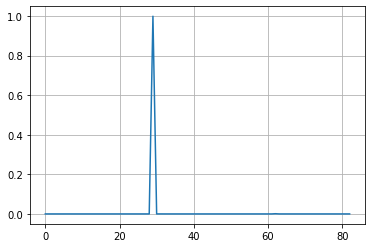

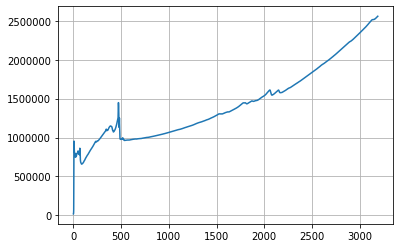

In [59]:
import json 
cuda = torch.device('cuda:0')

data = json.load(open("/home/master/Notebook/AES_DATABASE/json/hg10.json"))
infre = torch.tensor(pad(norm(data["Specs"])), device="cpu").float().view(1, 1, -1)

results = model.forward(infre)[0]
sx = torch.nn.Softmax(dim=-1)
results = sx(results).numpy()
plt.plot(results.reshape(-1 ,1))
print(np.flip(np.argsort(results)))
print(sorted(results[0], reverse=True))
plt.show()
plt.plot(data["Specs"])

In [57]:
list(set(elements))[64]

'nb'

In [60]:
exs = []
for item in np.argsort(results)[0]:
  exs.append((list(set(elements))[item]))
print(np.flip(exs))


['au' 'ho' 'nd' 'te' 'ar' 'ca' 'la' 'gd' 'si' 'ga' 'tl' 'w' 'ta' 'i' 'se'
 'u' 'be' 'yb' 'gap' 'ce' 'ge' 'al' 'sr' 'n' 'na' 're' 'pd' 'xe' 'lu' 'li'
 'o' 'mo' 'b' 'rh' 'sm' 'cs' 'v' 'tm' 'ni' 'sc' 'pr' 'os' 'zr' 'ti' 'mg'
 'co' 'sb' 'wsd' 'y' 'ag' 'rb' 's' 'ne' 'cd' 'pt' 'ir' 'eu' 'ba' 'mn' 'hg'
 'er' 'fe' 'in' 'f' 'cl' 'hf' 'cr' 'k' 'sn' 'p' 'cu' 'c' 'as' 'tb' 'th'
 'ru' 'bi' 'dy' 'kr' 'zn' 'pb' 'br' 'nb']


In [0]:
def pretty_size(size):
	"""Pretty prints a torch.Size object"""
	assert(isinstance(size, torch.Size))
	return " × ".join(map(str, size))

def dump_tensors(gpu_only=True):
	"""Prints a list of the Tensors being tracked by the garbage collector."""
	import gc
	total_size = 0
	for obj in gc.get_objects():
		try:
			if torch.is_tensor(obj):
				if not gpu_only or obj.is_cuda:
					print("%s:%s%s %s" % (type(obj).__name__, 
										  " GPU" if obj.is_cuda else "",
										  " pinned" if obj.is_pinned else "",
										  pretty_size(obj.size())))
					total_size += obj.numel()
			elif hasattr(obj, "data") and torch.is_tensor(obj.data):
				if not gpu_only or obj.is_cuda:
					print("%s → %s:%s%s%s%s %s" % (type(obj).__name__, 
												   type(obj.data).__name__, 
												   " GPU" if obj.is_cuda else "",
												   " pinned" if obj.data.is_pinned else "",
												   " grad" if obj.requires_grad else "", 
												   " volatile" if obj.volatile else "",
												   pretty_size(obj.data.size())))
					total_size += obj.data.numel()
		except Exception as e:
			pass        
	print("Total size:", total_size)

In [61]:
dump_tensors()

/home/master/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Series.data is deprecated and will be removed in a future version
/home/master/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Float64Index.data is deprecated and will be removed in a future version
/usr/local/anaconda/envs/fastai/lib/python3.7/site-packages/torch/distributed/distributed_c10d.py:101: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "
wandb: WARNING import wandb.keras called before import keras or import tensorflow.keras.  This can lead to a version mismatch, W&B now assumes tensorflow.keras


Parameter: GPU pinned 128 × 1 × 11
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 21
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 41
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 11
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 21
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 41
Parameter: GPU pinned 128
Parameter: GPU pinned 84
Parameter: GPU pinned 84 × 2048
Parameter: GPU pinned 2048
Parameter: GPU pinned 2048 × 1025
Parameter: GPU pinned 1
Parameter: GPU pinned 1 × 512
Parameter: GPU pinned 512
Parameter: GPU pinned 512 × 1024
Parameter: GPU pinned 1024
Parameter: GPU pinned 1024 × 384 × 5
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 41
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 21
Parameter: GPU pinned 128
Parameter: GPU pinned 128 × 1 × 11
Total size: 4794965


In [0]:
torch.cuda.empty_cache()